# Credit Card Fraud Detection

## Dataset : https://www.kaggle.com/mlg-ulb/creditcardfraud 

### Description :

- Time : Number of seconds elapsed between this transaction and the first transaction in the dataset (1 day = 86400 second)
- V1 - V28 : the principal components obtained with PCA, Dimensionality reduction to protect user identities and sensitive features
- Amount : Transaction amount
- Class : 1 for fraudlent transactions, 0 otherwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfFraud = pd.read_csv('creditcard.csv')
dfFraud.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
dfFraud.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
dfFraud.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.

In [5]:
dfFraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
listItem = []

for col in dfFraud.columns:
    listItem.append([col, dfFraud[col].dtype, dfFraud[col].isna().sum(),
                    round((dfFraud[col].isna().sum()/len(dfFraud[col]))*100, 2),
                    dfFraud[col].nunique(), list(dfFraud[col].unique()[:2])]);
    
dfDesc = pd.DataFrame(
    columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
    data = listItem
)

dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Time,float64,0,0.0,124592,"[0.0, 1.0]"
1,V1,float64,0,0.0,275663,"[-1.3598071336738, 1.1918571113148602]"
2,V2,float64,0,0.0,275663,"[-0.0727811733098497, 0.26615071205963]"
3,V3,float64,0,0.0,275663,"[2.53634673796914, 0.16648011335321]"
4,V4,float64,0,0.0,275663,"[1.37815522427443, 0.448154078460911]"
5,V5,float64,0,0.0,275663,"[-0.33832076994251803, 0.0600176492822243]"
6,V6,float64,0,0.0,275663,"[0.462387777762292, -0.0823608088155687]"
7,V7,float64,0,0.0,275663,"[0.239598554061257, -0.0788029833323113]"
8,V8,float64,0,0.0,275663,"[0.0986979012610507, 0.0851016549148104]"
9,V9,float64,0,0.0,275663,"[0.363786969611213, -0.255425128109186]"


In [7]:
dfFraud['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

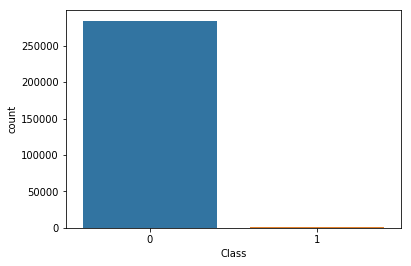

In [8]:
sns.countplot("Class", data=dfFraud)

In [9]:
(dfFraud['Class'].value_counts()/len(dfFraud)) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

# Imbalance Data

Most of the transactions are non-fraud. if we use this dataframe as the base for our predictive model and analysis we might get a lot of errors and the algorithms will overfit since it will "assume" that most transactions are "NOT FRAUD".

Now let's see the amount of transactions based on time and 'fraud/not fraud' .

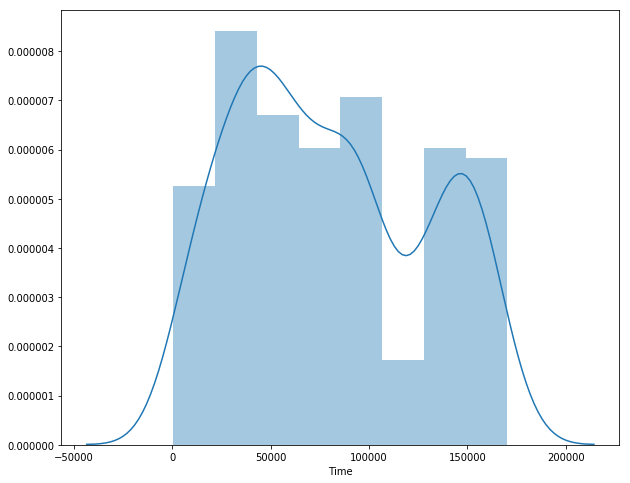

In [10]:
plt.figure(figsize=(10,8))
sns.distplot(dfFraud[dfFraud['Class']==1]['Time'])

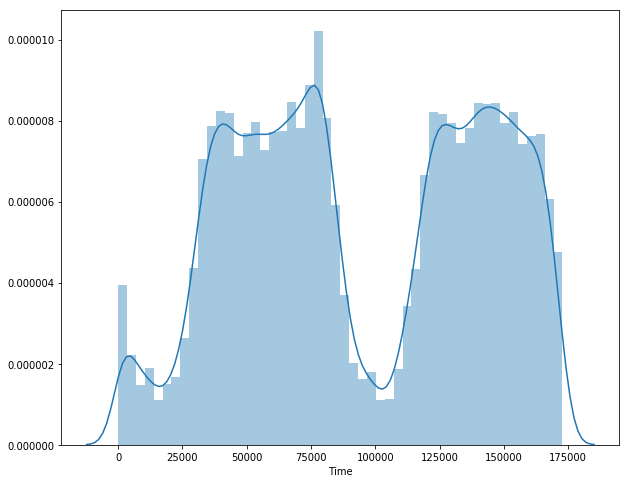

In [11]:
plt.figure(figsize=(10,8))
sns.distplot(dfFraud[dfFraud['Class']==0]['Time'])

In [12]:
print('Amount of Fraud Transactions on the First Day :', len(dfFraud[(dfFraud['Time'] <= 86400) & (dfFraud['Class'] == 1)]))
print('Amount of Fraud Transactions on the Second Day :', len(dfFraud[(dfFraud['Time'] > 86400) & (dfFraud['Class'] == 1)]))

Amount of Fraud Transactions on the First Day : 281
Amount of Fraud Transactions on the Second Day : 211


In [13]:
print('Amount of Not - Fraud Transactions on the First Day :', len(dfFraud[(dfFraud['Time'] <= 86400) & (dfFraud['Class'] == 0)]))
print('Amount of Not - Fraud Transactions on the Second Day :', len(dfFraud[(dfFraud['Time'] > 86400) & (dfFraud['Class'] == 0)]))

Amount of Not - Fraud Transactions on the First Day : 144506
Amount of Not - Fraud Transactions on the Second Day : 139809


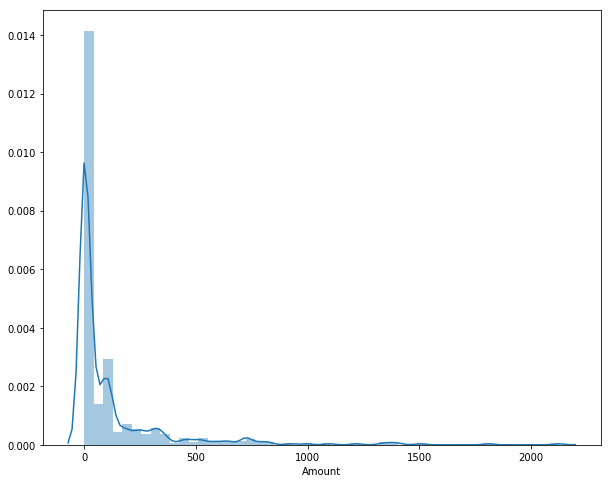

In [14]:
plt.figure(figsize=(10,8))
sns.distplot(dfFraud[dfFraud['Class']==1]['Amount'])

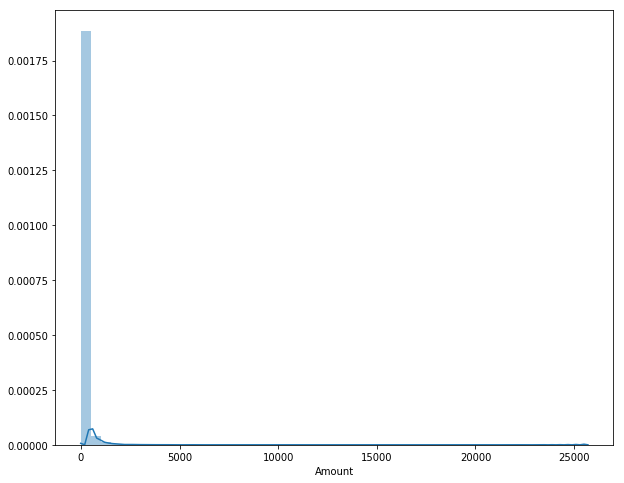

In [15]:
plt.figure(figsize=(10,8))
sns.distplot(dfFraud[dfFraud['Class'] == 0]["Amount"])

In [16]:
(dfFraud[dfFraud['Class'] == 1]["Amount"]).max()

2125.87

In [17]:
(dfFraud[dfFraud['Class'] == 0]["Amount"]).max()

25691.16

In [18]:
len(dfFraud[(dfFraud['Class'] == 0) & (dfFraud['Amount'] > 2125)])

603

## Now let's try to pre-processing our model with standard scaler. 
### Standard scler = a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dfFraud.drop('Class', axis=1))
scaled_features = scaler.transform(dfFraud.drop('Class', axis=1))

dfScaled = pd.DataFrame(scaled_features, columns=dfFraud.drop('Class', axis = 1).columns)
dfScaled['Class'] = dfFraud['Class']
dfScaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


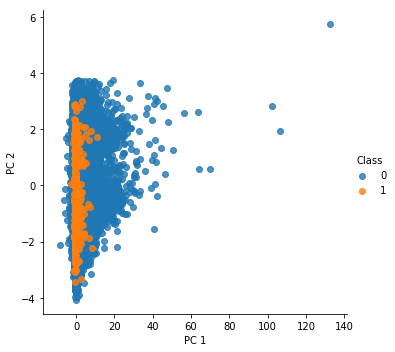

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(dfScaled.drop('Class', axis=1))
x_pca = pca.transform(dfScaled.drop('Class', axis=1))
dfPCA = pd.DataFrame(x_pca, columns=['PC ' + str(i) for i in range(1,3)])
dfPCA['Class'] = dfFraud['Class']

sns.lmplot(x='PC 1', y="PC 2", hue = "Class", data =dfPCA, fit_reg=False)

In [21]:
pca.explained_variance_ratio_

array([0.06527406, 0.05611509])

In [22]:
round(dfPCA.corr(), 3)

,PC 1,PC 2,Class
PC 1,1.000,-0.000,0.005
PC 2,-0.000,1.000,-0.015
Class,0.005,-0.015,1.000


In [23]:
dfFraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Machine Learning Model with Random Forest 

In [24]:
from sklearn.model_selection import train_test_split

xtr, xts, ytr, yts = train_test_split(
    dfFraud.drop('Class', axis=1),
    dfFraud['Class'],
    test_size=0.30,
    random_state=101
)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=50)
rfc.fit(xtr, ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

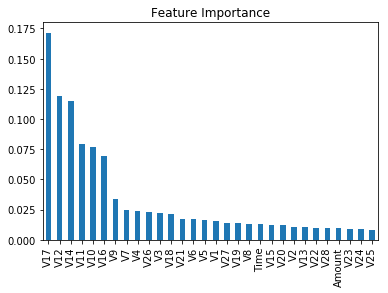

In [26]:
coef1 = pd.Series(rfc.feature_importances_, xtr.columns).sort_values(ascending=False)
coef1.plot(kind="bar", title='Feature Importance')

## Generally, feature importance provides a score that indicates how useful or valuable each feature was. 
## The more an attribute is used to make key decisions, the higher its relative importance.

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc, log_loss, roc_auc_score, f1_score

predictTrain = rfc.predict(xtr)
predictTrain

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
con = pd.DataFrame(
    data = confusion_matrix(ytr, predictTrain),
    columns = ['P No', 'P Yes'],
    index = ['A No', 'A Yes']
)

print(con)

         P No  P Yes
A No   199016      0
A Yes       1    347


In [29]:
print(classification_report(ytr, predictTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       1.00      1.00      1.00       348

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [30]:
predictTest = rfc.predict(xts)
print(classification_report(yts, predictTest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.94      0.81      0.87       144

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [31]:
predictProbTrain = rfc.predict_proba(xtr)

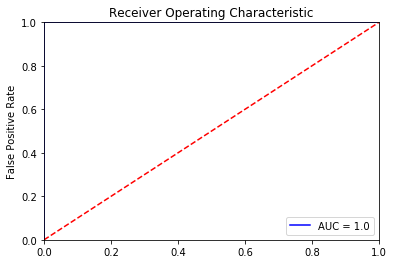

In [32]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(ytr, preds)
roc_auc = auc(fpr, tpr)

#method I : plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()

In [33]:
predictProbTest = rfc.predict_proba(xts)

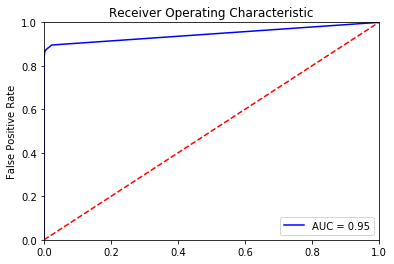

In [34]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr, tpr, threshold = roc_curve(yts, preds)
roc_auc = auc(fpr, tpr)

#method I : plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()